# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import dataset

In [2]:
insurance = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
807,19,female,36.575,0,no,northwest,2136.88225
1321,62,male,26.695,0,yes,northeast,28101.33305
94,64,female,31.300,2,yes,southwest,47291.05500
1102,29,male,38.940,1,no,southeast,3471.40960
179,41,female,33.155,3,no,northeast,8538.28845


# data cleaning

In [4]:
# check data type

insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# check null values

insurance.isnull().any(), insurance.isnull().sum()

(age         False
 sex         False
 bmi         False
 children    False
 smoker      False
 region      False
 charges     False
 dtype: bool,
 age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64)

In [6]:
# check duplicated values

insurance.duplicated().any(), insurance.duplicated().sum()

(True, 1)

In [7]:
insurance.drop_duplicates(inplace= True)

In [8]:
# check duplicated values again

insurance.duplicated().any(), insurance.duplicated().sum()

(False, 0)

In [9]:
# check data validity

insurance.select_dtypes(include= 'object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [10]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
insurance.describe().round(2)

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


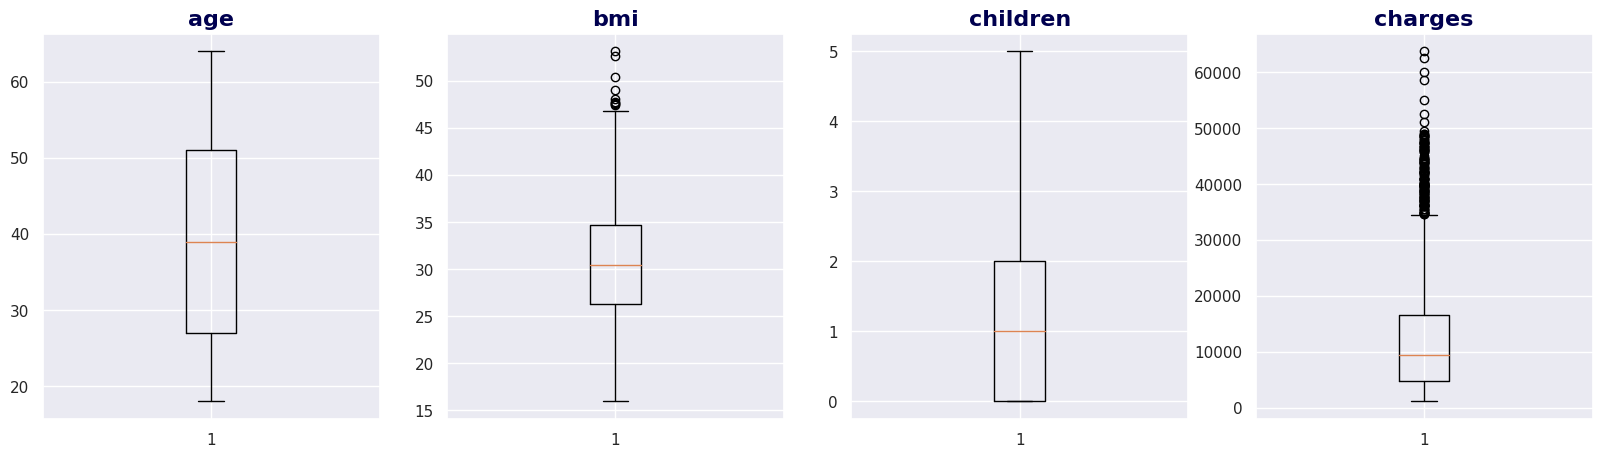

In [14]:
# check outliers

fig, ax = plt.subplots(nrows= 1,\
                       ncols= len(insurance.select_dtypes(exclude= 'object').columns),\
                       sharey= False,\
                       figsize= (20, 5))

for i in np.arange(0, len(insurance.select_dtypes(exclude= 'object').columns), 1) :
    
    ax[i].boxplot(data= insurance.select_dtypes(exclude= 'object'),\
                  x= insurance.select_dtypes(exclude= 'object').columns[i])
    ax[i].set_title(insurance.select_dtypes(exclude= 'object').columns[i],\
                    fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})

plt.show()

In [15]:
insurance = insurance[insurance['bmi'] <= 50]

In [16]:
insurance = insurance[insurance['charges'] <= 55000]

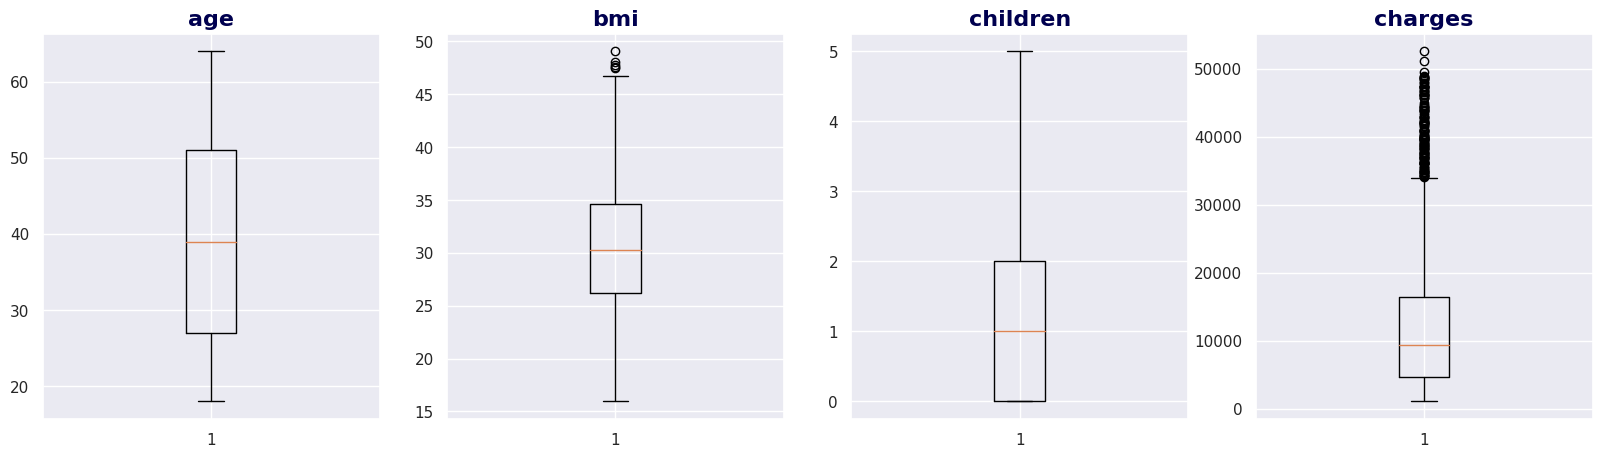

In [17]:
# check outliers again

fig, ax = plt.subplots(nrows= 1,\
                       ncols= len(insurance.select_dtypes(exclude= 'object').columns),\
                       sharey= False,\
                       figsize= (20, 5))

for i in np.arange(0, len(insurance.select_dtypes(exclude= 'object').columns), 1) :
    
    ax[i].boxplot(data= insurance.select_dtypes(exclude= 'object'),\
                  x= insurance.select_dtypes(exclude= 'object').columns[i])
    ax[i].set_title(insurance.select_dtypes(exclude= 'object').columns[i],\
                    fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})

plt.show()

In [18]:
# last check

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


In [19]:
# reset index

insurance.reset_index(drop= True,inplace= True)

In [20]:
# last check

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.8+ KB


# data analysis

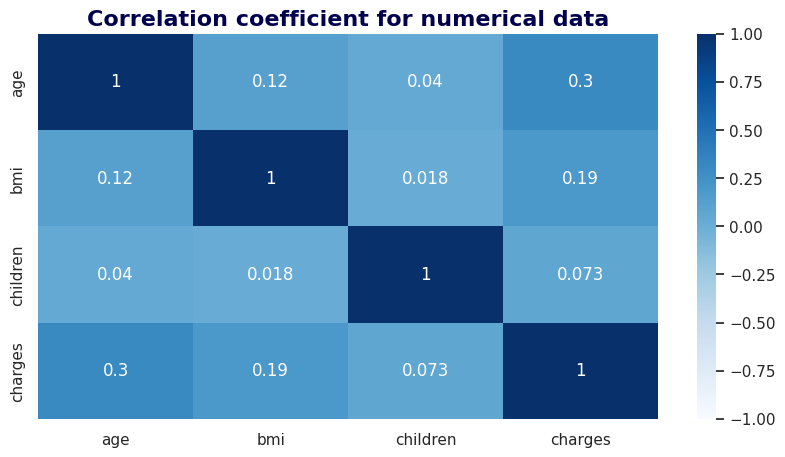

In [21]:
plt.figure(figsize= (10, 5))
sns.heatmap(insurance.select_dtypes(exclude= 'object').corr(numeric_only= True),\
            cmap= 'Blues',\
            vmax= 1,\
            vmin= -1,\
            annot= True)
plt.title('Correlation coefficient for numerical data',\
          fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.show()

# **what is the most common age with insurance?**

In [22]:
insurance['age'].value_counts().head(10)

age
18    68
19    67
50    29
51    29
47    29
46    29
20    29
48    29
52    28
49    28
Name: count, dtype: int64

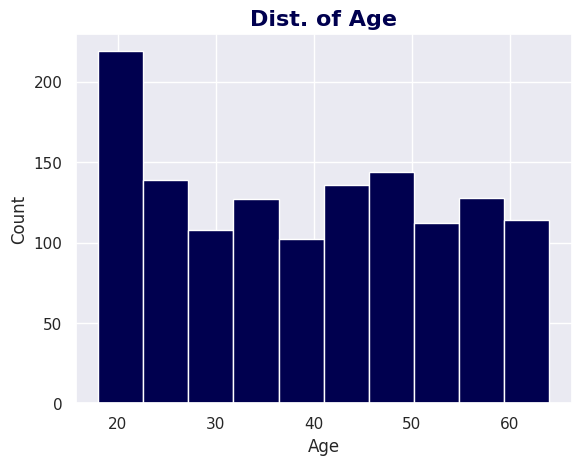

In [23]:
plt.hist(x= insurance['age'],\
         bins= 10,\
         color= '#00004f')
plt.title('Dist. of Age',\
          fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'} )
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# **what is the most common gender with insurance?**

In [24]:
insurance['sex'].value_counts()

sex
male      670
female    659
Name: count, dtype: int64

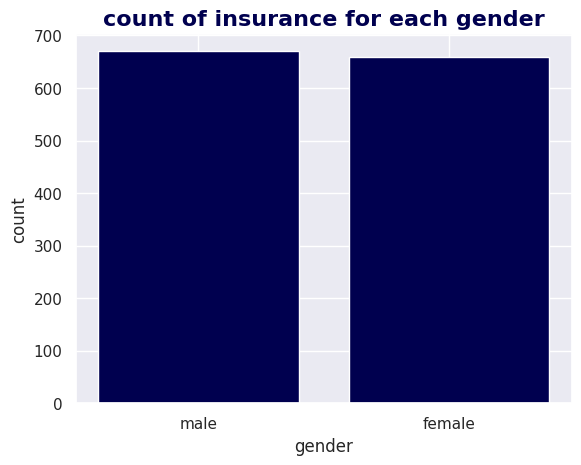

In [25]:
plt.bar(x= insurance['sex'].value_counts().index,\
        height= insurance['sex'].value_counts().values,\
        color= '#00004f')
plt.title('count of insurance for each gender',\
          fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

# **what is the count of insurance regarding to smoker status or not?**

In [26]:
insurance['smoker'].value_counts()

smoker
no     1061
yes     268
Name: count, dtype: int64

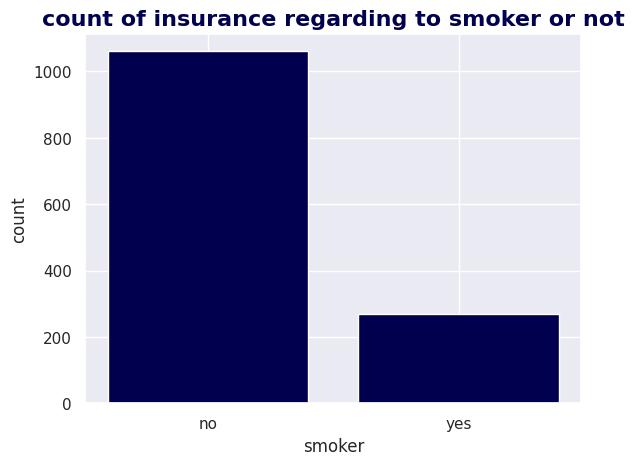

In [27]:
plt.bar(x= insurance['smoker'].value_counts().index,\
        height= insurance['smoker'].value_counts().values,\
        color= '#00004f')
plt.title('count of insurance regarding to smoker or not',\
          fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

# **what is the count of insurance for each region**

In [28]:
insurance['region'].value_counts()

region
southeast    359
southwest    325
northeast    323
northwest    322
Name: count, dtype: int64

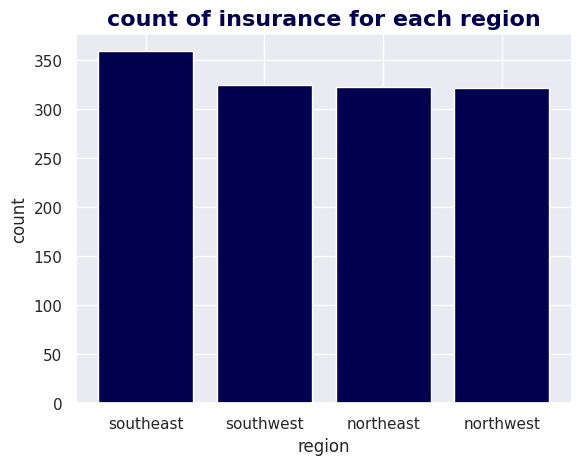

In [29]:
plt.bar(x= insurance['region'].value_counts().index,\
        height= insurance['region'].value_counts().values,\
        color= '#00004f')
plt.title('count of insurance for each region',\
          fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('region')
plt.ylabel('count')
plt.show()

In [30]:
insurance.groupby('sex').agg({'charges': 'sum'})

,charges
sex,
female,8.143584e+06
male,9.262407e+06


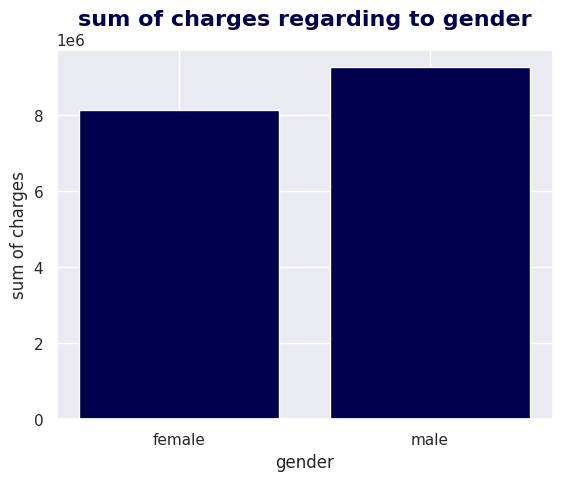

In [31]:
plt.bar(data= insurance.groupby('sex').agg({'charges': 'sum'}),\
        x= insurance.groupby('sex').agg({'charges': 'sum'}).index,\
        height= insurance.groupby('sex').agg({'charges': 'sum'})['charges'],\
        color= '#00004f')
plt.title('sum of charges regarding to gender',\
         fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('gender')
plt.ylabel('sum of charges')
plt.show()

# **what is the sum of charges for each gender regarding to age?**

In [32]:
insurance.pivot_table(index= 'age', columns= 'sex', values= 'charges', aggfunc= 'sum').sample(5)

sex,female,male
age,,
47,241149.576400,270816.41180
62,200492.544710,240276.15648
57,217230.015910,210396.80059
18,215234.511319,272551.03737
60,190380.605270,315146.02040


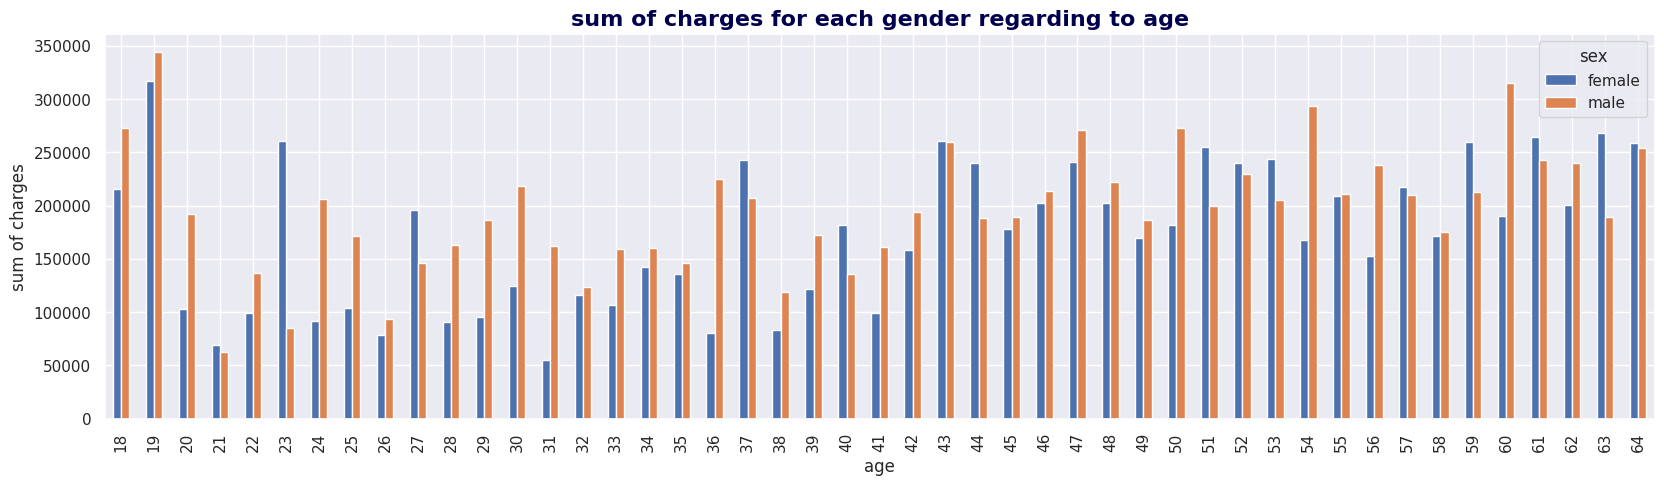

In [33]:
insurance.pivot_table(index= 'age', columns= 'sex', values= 'charges', aggfunc= 'sum').plot(kind= 'bar', figsize= (20, 5))
plt.title('sum of charges for each gender regarding to age',\
         fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.ylabel('sum of charges')
plt.show()